1/1 [==============================] - 0s 158ms/step


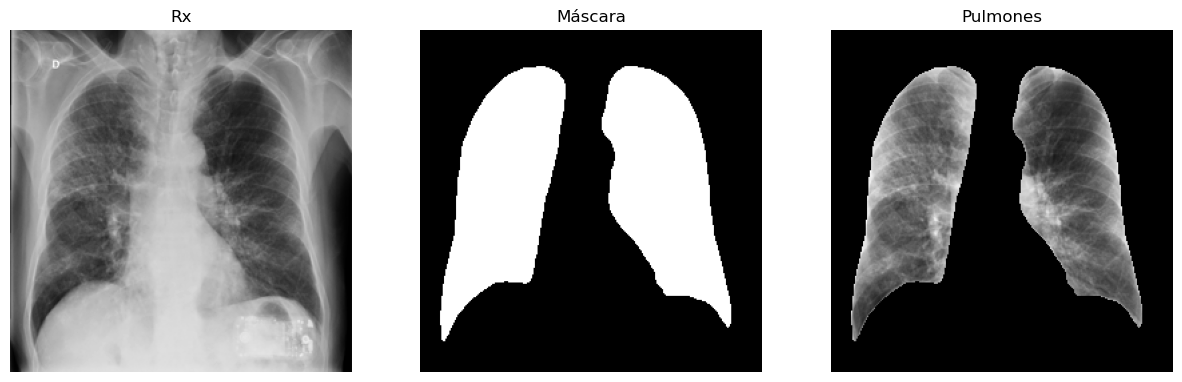

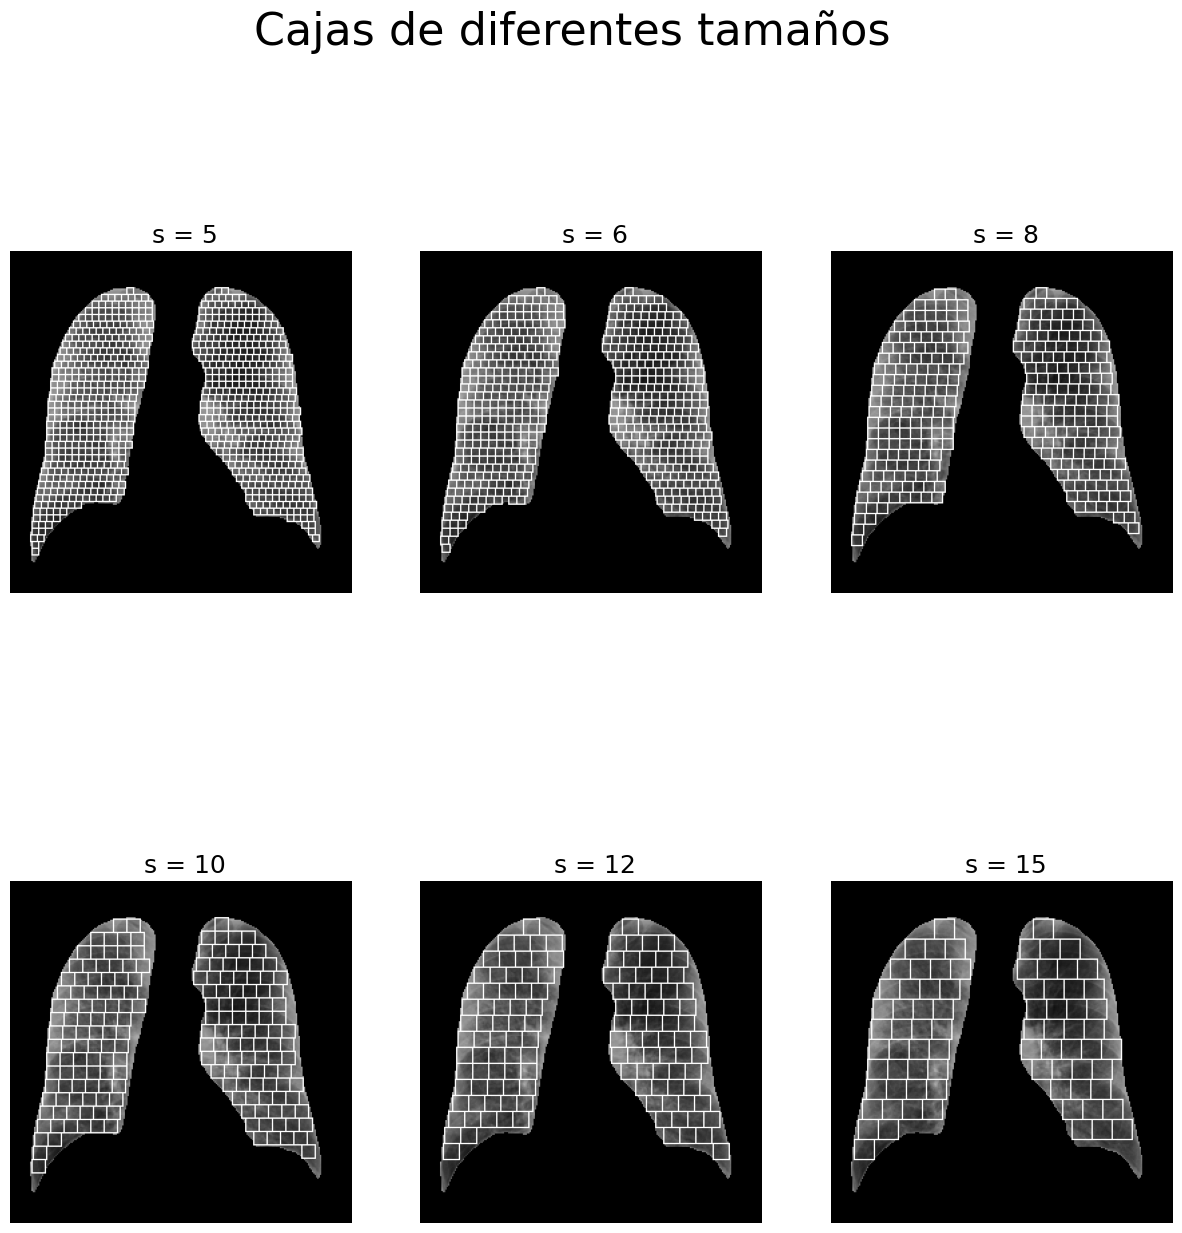

In [14]:
import numpy as np
from Utils import load_img,unet_segmenta, boxescount
import cv2
import matplotlib.pyplot as plt
import os

path_covid_origen = "Data_Source\COVID-QU-Ex dataset\Lung Segmentation Data\Lung Segmentation Data\Train\COVID-19\images"

model = unet_segmenta()

img_list = os.listdir(path_covid_origen)
image_path = os.path.join(path_covid_origen,img_list[np.random.randint(0,len(img_list))])
image = cv2.imread(image_path, 0)
image = load_img(image)
mask = model.predict(image)
lungs = np.array(image[0,:,:,0])*255
lungs[mask[0,:,:,0]<0.5] = 0

plt.figure(figsize=[15,15])

plt.subplot(1,3,1)
plt.title("Rx")
plt.axis("off")
plt.imshow(image[0,:,:,0],cmap="gray")

plt.subplot(1,3,2)
plt.title("Máscara")
plt.axis("off")
plt.imshow(mask[0,:,:,0]>0.5,cmap="gray")

plt.subplot(1,3,3)
plt.title("Pulmones")
plt.axis("off")
plt.imshow(lungs,cmap="gray")

plt.savefig("Images\lungs", bbox_inches='tight')

boxes = boxescount(lungs=lungs)
dic_boxes = boxes.dic_boxes()

plt.figure(figsize=[15,15])
plt.suptitle("Cajas de diferentes tamaños", fontsize = 32)
s = 4
for i in range(6):
    s = int(s * np.sqrt(np.sqrt(2)) ) + 1
    box_img = boxes.show_boxes(s, show=False)
    plt.subplot(2,3,i + 1)
    plt.axis("off")
    plt.title(f" s = {s}", fontsize = 18)
    plt.imshow(box_img, cmap="gray")
plt.savefig("Images\Boxes.png", bbox_inches='tight')